Epoch 1/20
469/469 [==============================] - 10s 20ms/step - loss: 0.2667 - accuracy: 0.9197 - val_loss: 0.1103 - val_accuracy: 0.9651
Epoch 2/20
469/469 [==============================] - 10s 22ms/step - loss: 0.1078 - accuracy: 0.9675 - val_loss: 0.0762 - val_accuracy: 0.9747
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0773 - accuracy: 0.9762 - val_loss: 0.0725 - val_accuracy: 0.9772
Epoch 4/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0583 - accuracy: 0.9818 - val_loss: 0.0659 - val_accuracy: 0.9798
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0493 - accuracy: 0.9845 - val_loss: 0.0657 - val_accuracy: 0.9788
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.0641 - val_accuracy: 0.9815
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0367 - accuracy: 0.9882 - val_loss: 0.0611 - val_accuracy: 0.9

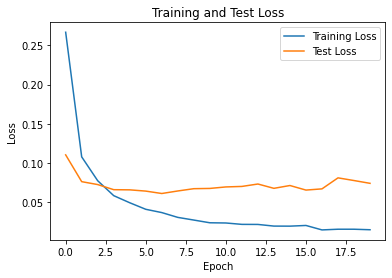

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to a 2D array of shape (num_samples, 28*28)
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

# Convert the data to float32 and scale the pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Converting the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the model architecture
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28*28,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Plot the training and test loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()